### To run SQL commands with Pandas
* brew install unixodbc
* brew tap microsoft/mssql-release https://github.com/Microsoft/homebrew-mssql-release
* brew update
* HOMEBREW_ACCEPT_EULA=Y brew install msodbcsql18

In [1]:

from sqlalchemy import create_engine
import pandas as pd

server = 'cemsserver.database.windows.net' 
database = 'employee' 
username = 'azureuser' 
password = 'Kbgzv8h#'
driver = 'ODBC Driver 18 for SQL Server'
connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver={driver}'

engine = create_engine(connection_string)


query = "SELECT * FROM employee;"
df = pd.read_sql(query, engine)
df

DBAPIError: (pyodbc.Error) ('01000', "[01000] [unixODBC][Driver Manager]Can't open lib 'ODBC Driver 18 for SQL Server' : file not found (0) (SQLDriverConnect)")
(Background on this error at: https://sqlalche.me/e/20/dbapi)

In [2]:
#Omit last column
df = df[df.columns[:-1]]

In [3]:
df.loc[: , 'Annual_Salary']

0      $141,604 
1       $99,975 
2      $163,099 
3       $84,913 
4       $95,409 
         ...    
995     $98,427 
996     $47,387 
997    $176,710 
998     $95,960 
999    $216,195 
Name: Annual_Salary, Length: 1000, dtype: object

In [4]:
df.dtypes

EEID                     object
Full_Name                object
Job_Title                object
Department               object
Business_Unit            object
Gender                   object
Ethnicity                object
Age                       int64
Hire_Date        datetime64[ns]
Annual_Salary            object
Bonus                   float64
Country                  object
City                     object
dtype: object

In [5]:
df.loc[ : ,'Annual_Salary'] =  df.loc[: ,'Annual_Salary'].str.replace(r'[\$,]', '', regex=True)

In [6]:
df.loc[:, 'Annual_Salary'] = df.loc[:,'Annual_Salary'].astype('Float64')

In [7]:
df = df.convert_dtypes()

In [9]:
#shift + tab -> read documentation
df.loc[ :,'Department'] = df.loc[ : ,'Department'].str.replace('Human Resources', 'HR')

In [14]:
df[df.columns[[7,9,10]]].describe().round(2) 

,Age,Annual_Salary,Bonus
count,1000.0,1000.0,1000.0
mean,44.38,113217.36,8.87
std,11.25,53545.99,11.79
min,25.0,40063.0,0.0
25%,35.0,71430.25,0.0
50%,45.0,96557.0,0.0
75%,54.0,150782.25,15.0
max,65.0,258498.0,40.0


In [34]:
male = df[df.Gender == 'Male']
male[['Annual_Salary']].agg(['mean', 'max', 'min'])

,Annual_Salary
mean,114188.008299
max,258081.000000
min,40063.000000


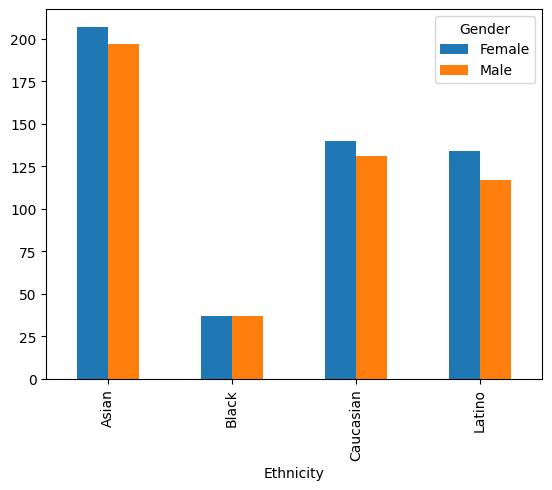

In [11]:
subset = df.filter(df.columns[[1,2,3,5,6,7,9,10,11,12]])
subset
subset.groupby(by=[subset.Ethnicity, subset.Gender]).size().unstack('Gender').plot(kind='bar');

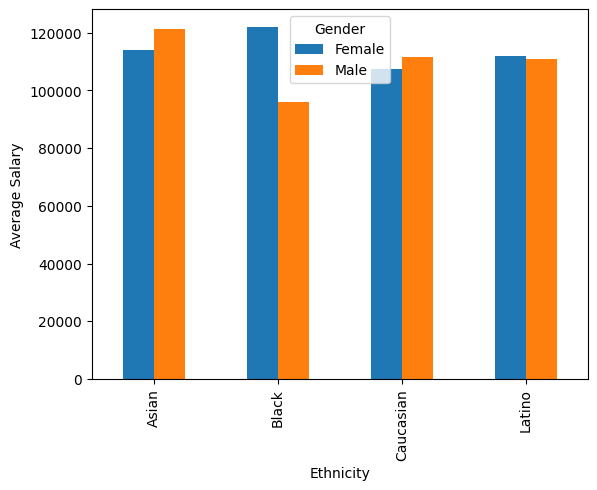

In [12]:
subset.groupby(by=[subset.Ethnicity, subset.Gender])['Annual_Salary'].mean().unstack('Gender').plot(kind='bar', ylabel='Average Salary');

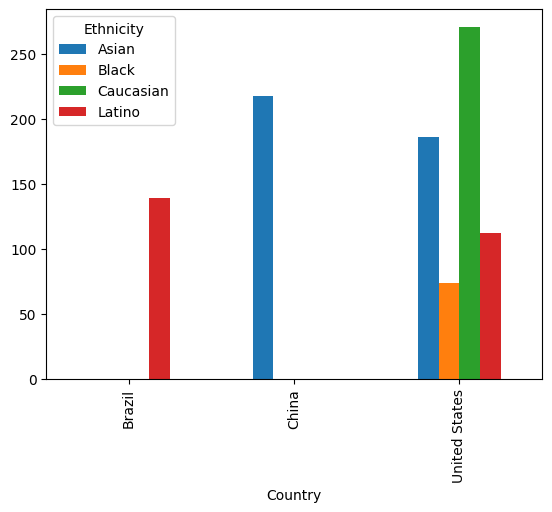

In [123]:
f = subset.groupby(by=['Ethnicity', 'Country']).size()
f.unstack('Ethnicity').plot(kind='bar');


In [13]:
# Use the to_sql method to write the DataFrame to a SQL table

#table_name = 'copy_employee'
#df.to_sql(name=table_name, con=engine, if_exists='replace', index=False)